
```



*   Mount your google drive.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive




*   Import necessary libraries.



In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [ ]:
path ="/content/drive/MyDrive/StressLevelDataset.csv"
df=pd.read_csv(path)

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [ ]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)
df_filtered = df.drop_duplicates()
print(df_filtered)
target_column = 'stress_level'
correlation_matrix = df_filtered.corr()
target_correlations = correlation_matrix[target_column].abs()
highly_correlated_features_target = target_correlations[target_correlations > 0.7].index
highly_correlated_features = set()
for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[col] > 0.7].tolist()
    highly_correlated_features.update(correlated_cols)
features_to_remove = list(highly_correlated_features - set(highly_correlated_features_target))
df_filtered = df_filtered.drop(columns=features_to_remove)


Missing Values:
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64
      anxiety_level  self_esteem  mental_health_history  depression  headache  \
0                14           20                      0          11         2   
1                15            8                      1          15         5   
2            

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

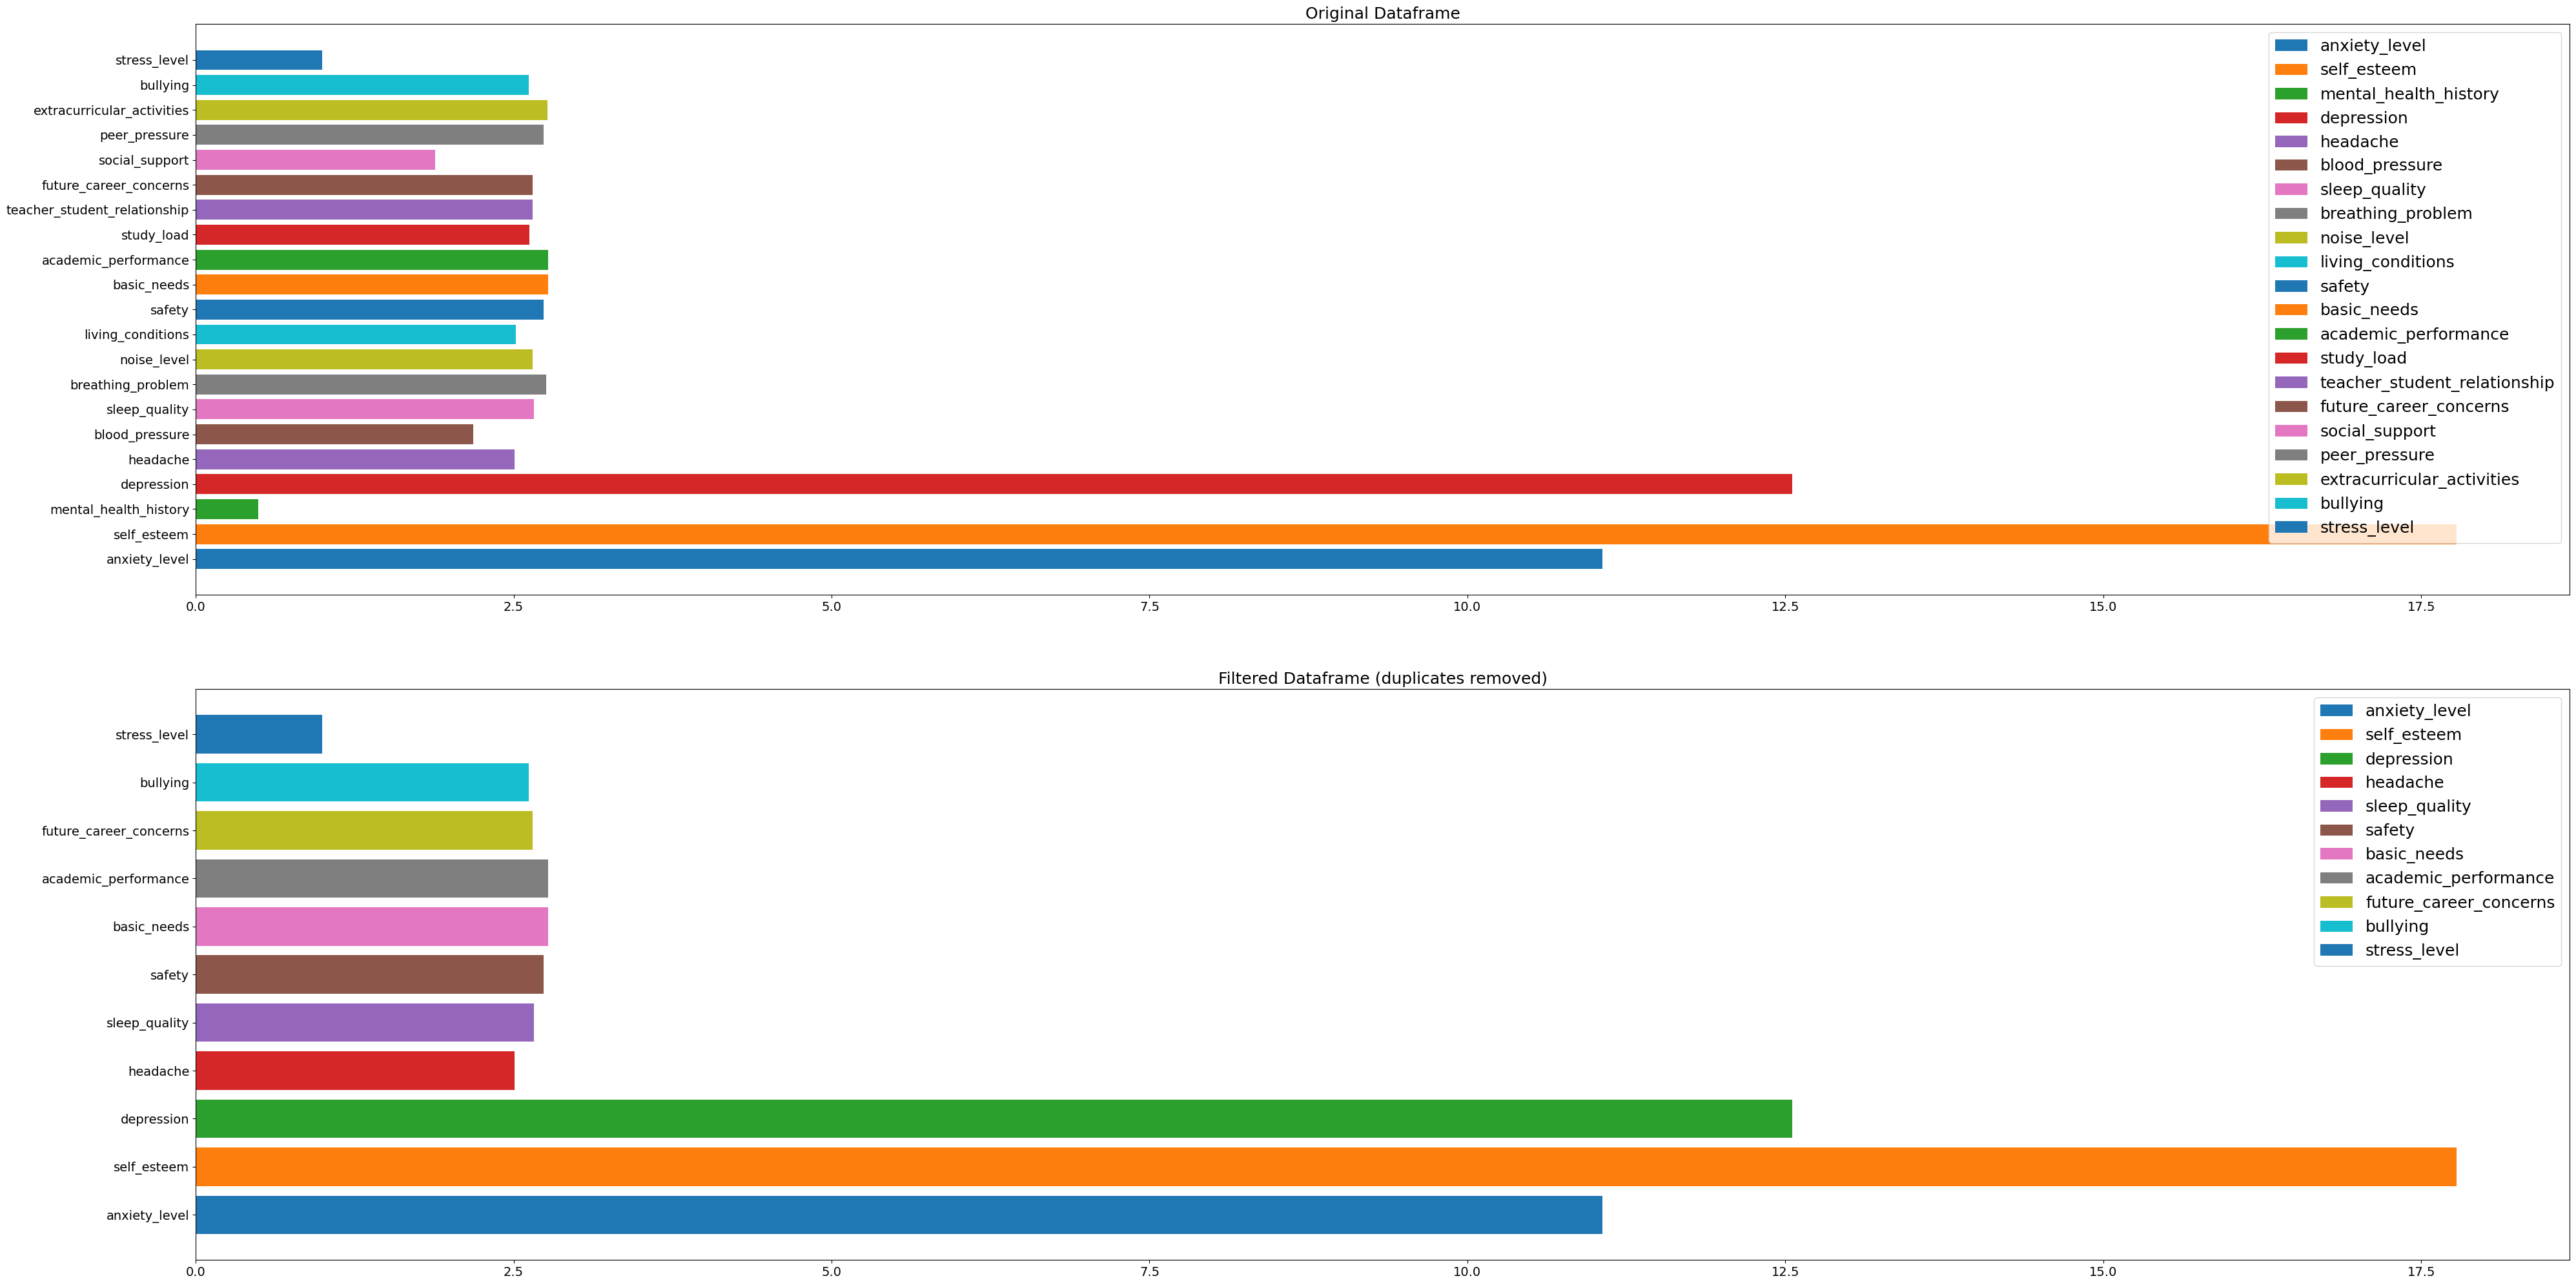

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(40, 20))
for col in df.columns:
    ax = axes[0]
    ax.barh(col, df[col].mean(), label=col)
    ax.set_title('Original Dataframe', fontsize = 18)
    ax.legend(fontsize = 18)

for col in df_filtered.columns:
    ax = axes[1]
    ax.barh(col, df_filtered[col].mean(), label=col)
    ax.set_title('Filtered Dataframe (duplicates removed)', fontsize = 18)
    ax.legend(fontsize = 18)

for ax in axes:
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()
plt.show()

•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

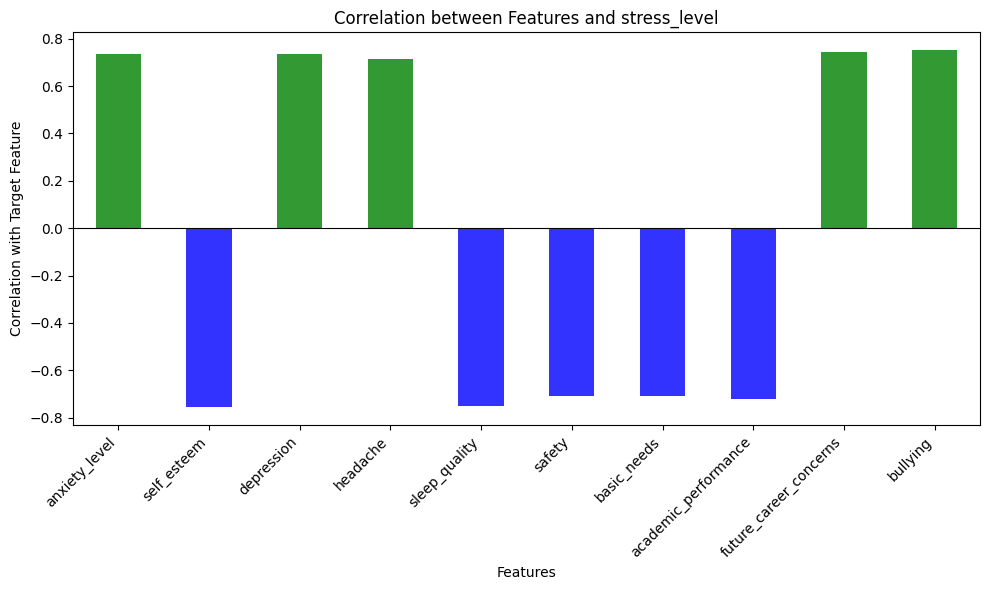

In [ ]:
correlations = df_filtered.corr()['stress_level'].drop('stress_level')

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color=['blue' if corr < 0 else 'green' for corr in correlations], alpha=0.8)
plt.xlabel('Features')
plt.ylabel('Correlation with Target Feature')
plt.title('Correlation between Features and stress_level')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered)

•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 321 as the value of the random_state parameter of this function.

In [ ]:
target_column = 'stress_level'
X = df_filtered.drop(columns=[target_column])
y = df_filtered[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [ ]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y_train)

GaussianNB()

•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

In [ ]:
nb_train_pred = naive_bayes_classifier.predict(X_train)
nb_test_pred = naive_bayes_classifier.predict(X_test)
label_names = sorted(df_filtered[target_column].unique())

conf_matrix_train = confusion_matrix(y_train, nb_train_pred, labels=label_names)
print("Confusion Matrix for Training Set:")
print(pd.DataFrame(conf_matrix_train, index=label_names, columns=label_names))

conf_matrix_test = confusion_matrix(y_test, nb_test_pred, labels=label_names)
print("\nConfusion Matrix for Test Set:")
print(pd.DataFrame(conf_matrix_test, index=label_names, columns=label_names))

Confusion Matrix for Training Set:
     0    1    2
0  261    8   30
1   16  252   20
2   17   10  266

Confusion Matrix for Test Set:
    0   1   2
0  67   1   6
1   5  59   6
2   3   2  71


•	**Task 9:** Calculate the train and test accuracy of your model and compare them.

In [ ]:
train_accuracy = accuracy_score(y_train, nb_train_pred)
test_accuracy = accuracy_score(y_test, nb_test_pred)
print(f'\nTrain Accuracy: {train_accuracy:.2f}')
print(f'\nTest Accuracy: {test_accuracy:.2f}')


Train Accuracy: 0.89

Test Accuracy: 0.90


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [ ]:
cross_val_scores = cross_val_score(naive_bayes_classifier, X, y, cv=10)
print("\n10-fold Cross-Validation Accuracy:")
print(f"Mean Accuracy: {cross_val_scores.mean():.2f}")


10-fold Cross-Validation Accuracy:
Mean Accuracy: 0.88
